## Supervised Machine Learning: Linear Regression

### Dataset Iris

#### Importamos el dataset

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load Iris Data
iris = load_iris()
# Creating pd DataFrames
iris_df = pd.DataFrame(data= iris.data, columns= iris.feature_names)
target_df = pd.DataFrame(data= iris.target, columns= ['species'])
iris_df = pd.concat([iris_df, target_df], axis= 1)

In [ ]:
target_df['species'].unique()

array([0, 1, 2])

In [ ]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [ ]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


#### Separamos el dataframe entre features y target a predecir

In [ ]:
# Variables
X= iris_df.drop(labels= 'species', axis= 1)
y= iris_df['species']

#### Separamos el dataset entre datos de Training y de Test

In [ ]:
# Splitting the Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.30, random_state= 101)

#### Entrenamos el modelo

In [ ]:
# Instantiating LinearRegression() Model
lr = LinearRegression()

# Training/Fitting the Model
lr.fit(X_train, y_train)

LinearRegression()

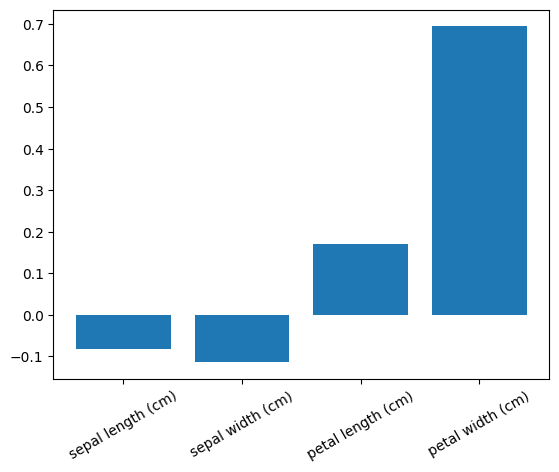

In [ ]:
importance = lr.coef_

plt.bar([x for x in range(len(importance))], importance)
plt.xticks([x for x in range(len(importance))], X.columns.values.tolist(), rotation=30)
plt.show()

#### Hacemos la predicción

In [ ]:
# list of integers of actual and calculated
actual = [2, 3, 5, 5, 9]
calculated = [3, 3, 8, 7, 6]

# calculate MAE
error = mean_absolute_error(actual, calculated)

# display
print("Mean absolute error : " + str(error))

Mean absolute error : 1.8


In [ ]:
# Making Predictions
lr.predict(X_test)
pred = lr.predict(X_test)

# Evaluating Model's Performance
print('Mean Absolute Error:', mean_absolute_error(y_test, pred))

Mean Absolute Error: 0.18730468513955986


### Dataset fetch_california_housing

#### Importamos el dataset "fetch_california_housing" de Sckit-learn:

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.datasets import fetch_california_housing
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

housing_dataset = fetch_california_housing()
print('Clase a predecir en el dataset: ')
print(housing_dataset.target_names)
print('Features: ')
print(housing_dataset.feature_names)
print(housing_dataset.data)

Clase a predecir en el dataset: 
['MedHouseVal']
Features: 
['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
[[   8.3252       41.            6.98412698 ...    2.55555556
    37.88       -122.23      ]
 [   8.3014       21.            6.23813708 ...    2.10984183
    37.86       -122.22      ]
 [   7.2574       52.            8.28813559 ...    2.80225989
    37.85       -122.24      ]
 ...
 [   1.7          17.            5.20554273 ...    2.3256351
    39.43       -121.22      ]
 [   1.8672       18.            5.32951289 ...    2.12320917
    39.43       -121.32      ]
 [   2.3886       16.            5.25471698 ...    2.61698113
    39.37       -121.24      ]]


#### Creamos el dataframe

In [2]:
# Creating pd DataFrames
housing_df = pd.DataFrame(data= housing_dataset.data, columns= housing_dataset.feature_names)
target_df = pd.DataFrame(data= housing_dataset.target, columns= housing_dataset.target_names)

housing_total_df = pd.concat([housing_df, target_df], axis= 1)

#### Separamos el dataframe entre features y target a predecir

In [3]:
# Variables
X= housing_total_df.drop(labels= 'MedHouseVal', axis= 1)
# X= housing_total_df[['MedInc', 'AveBedrms']]
y= housing_total_df['MedHouseVal']

#### Separamos el dataset entre datos de Training y de Test

In [4]:
# Splitting the Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.20)

#### Entrenamos el modelo

In [5]:
# Instantiating LinearRegression() Model
lr = LinearRegression()

# Training/Fitting the Model
model = lr.fit(X_train, y_train)

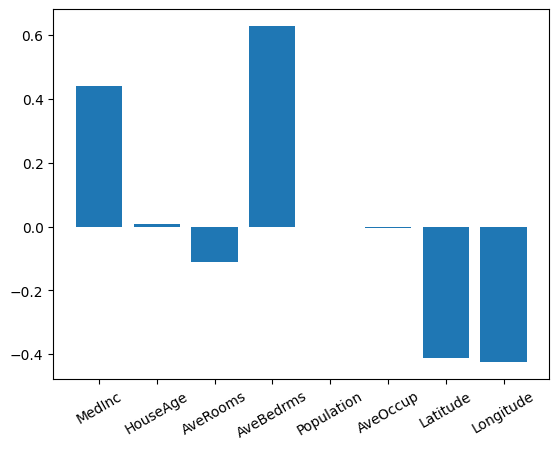

In [6]:
importance = model.coef_

plt.bar([x for x in range(len(importance))], importance)
plt.xticks([x for x in range(len(importance))], X.columns.values.tolist(), rotation=30)
plt.show()

### Guardado y carga de artefacto

In [8]:
import pickle
s = pickle.dumps(lr)
clf2 = pickle.loads(s)
print(clf2)

LinearRegression()


#### Hacemos la predicción

In [9]:
# Making Predictions
pred = clf2.predict(X_test)

# plt.scatter(y_test-pred,pred)
# plt.show()

# Evaluating Model's Performance
print('Mean Absolute Error:', mean_absolute_error(y_test, pred))

Mean Absolute Error: 0.5166953446391672


### Curvas ROC

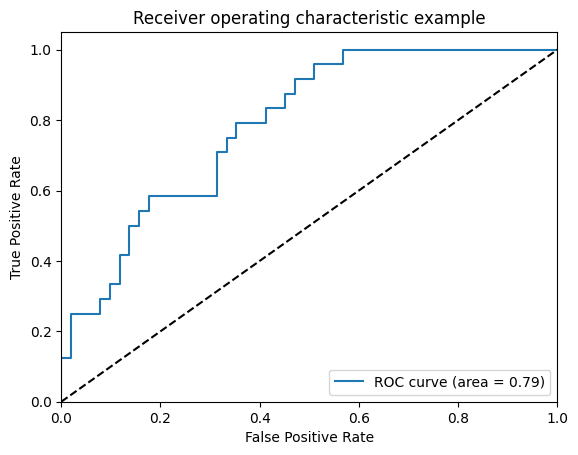

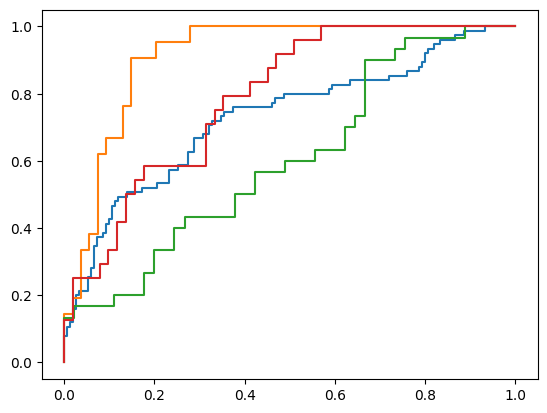

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LinearRegression

# Import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Binarize the output
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

# Add noisy features to make the problem harder
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5,
                                                    random_state=0)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=random_state))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr[2], tpr[2], label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

# Plot ROC curve
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                                   ''.format(i, roc_auc[i]))

## Unsupervised Machine Learning: Clustering

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# %% create dataset
# class1
x1 = np.random.normal(25,5,1000)
y1 = np.random.normal(25,5,1000)

# class2
x2 = np.random.normal(55,5,1000)
y2 = np.random.normal(60,5,1000)

# class3
x3 = np.random.normal(55,5,1000)
y3 = np.random.normal(15,5,1000)

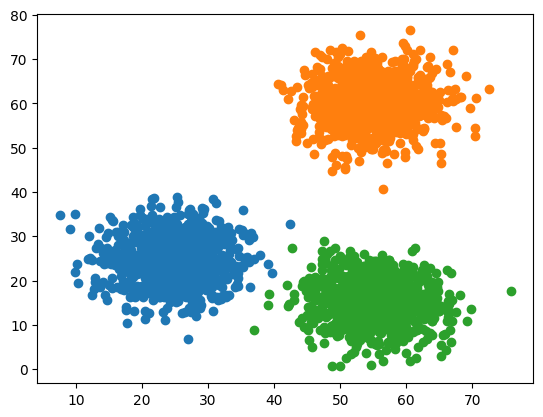

In [ ]:
x = np.concatenate((x1,x2,x3),axis = 0)
y = np.concatenate((y1,y2,y3),axis = 0)

dictionary = {"x":x,"y":y}
data = pd.DataFrame(dictionary)

plt.scatter(x1,y1)
plt.scatter(x2,y2)
plt.scatter(x3,y3)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

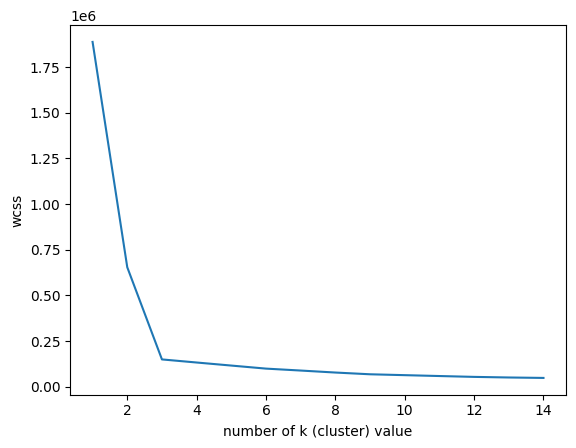

In [ ]:
# %% KMEANS

from sklearn.cluster import KMeans
wcss = []

for k in range(1,15):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,15),wcss)
plt.xlabel("number of k (cluster) value")
plt.ylabel("wcss")
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


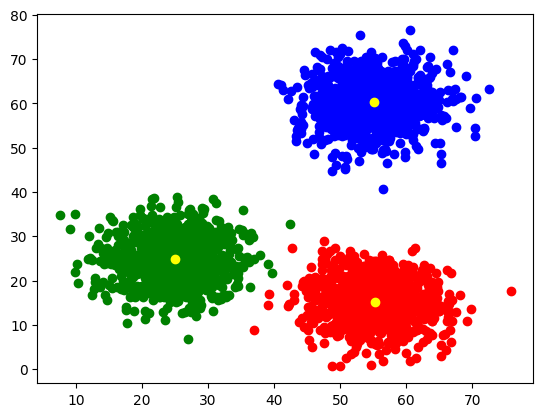

In [ ]:
#%% k = 3 icin modelim
kmeans2 = KMeans(n_clusters=3)
clusters = kmeans2.fit_predict(data)

data["label"] = clusters

plt.scatter(data.x[data.label == 0 ],data.y[data.label == 0],color = "red")
plt.scatter(data.x[data.label == 1 ],data.y[data.label == 1],color = "green")
plt.scatter(data.x[data.label == 2 ],data.y[data.label == 2],color = "blue")
plt.scatter(kmeans2.cluster_centers_[:,0],kmeans2.cluster_centers_[:,1],color = "yellow")
plt.show()